# Analyzing Relative Performance of Different DP Methods

## Activate Project and Import Functions

In [1]:
] activate ..

  Activating project at `~/Documents/Class/ThAlgs/Edist`


In [2]:
using Edist, BenchmarkTools
import Plots, Random

## Read FASTA Input Data

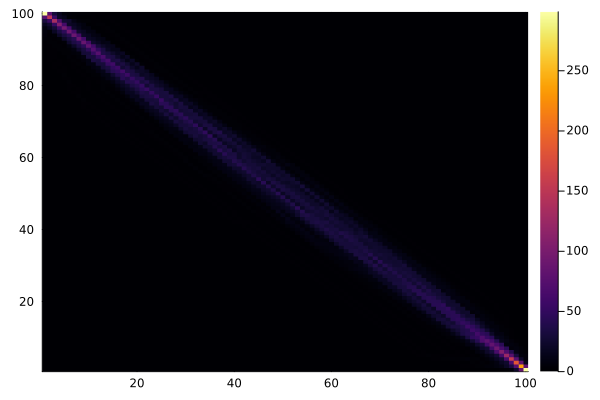

In [3]:
seq = get_fasta("../data/TP53_cross_species.fasta");
Full.visualize("../data/TP53_cross_species.fasta")

In [4]:
Plots.savefig("../data/graphics/solution_dist.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/solution_dist.png"

## Compare Running Time and Memory Usage

In [5]:
@benchmark score(Bounded, seq[1], seq[2])

BenchmarkTools.Trial: 284 samples with 1 evaluation.
 Range (min … max):  16.244 ms …  20.815 ms  ┊ GC (min … max): 0.00% … 4.57%
 Time  (median):     17.460 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   17.625 ms ± 453.223 μs  ┊ GC (mean ± σ):  1.82% ± 2.51%

                              ▂▄█▆▂▂                            
  ▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▄▅▆████████▄█▅▂▄▄▅▂▁▂▄▃▂▆▆▆▆▆▆▆▄▃▄▄ ▃
  16.2 ms         Histogram: frequency by time         18.4 ms <

 Memory estimate: 25.73 MiB, allocs estimate: 31.

In [6]:
@benchmark score(Full, seq[1], seq[2])

BenchmarkTools.Trial: 209 samples with 1 evaluation.
 Range (min … max):  21.965 ms … 27.425 ms  ┊ GC (min … max): 0.00% … 20.87%
 Time  (median):     22.596 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   23.983 ms ±  2.088 ms  ┊ GC (mean ± σ):  7.03% ±  8.87%

       █▇▃                                               ▁     
  ▂▁▂▃████▅▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▃▃▆█▆▅▃ ▃
  22 ms           Histogram: frequency by time        27.2 ms <

 Memory estimate: 34.17 MiB, allocs estimate: 11.

In [7]:
@benchmark score(Hirschberg, seq[1], seq[2])

BenchmarkTools.Trial: 147 samples with 1 evaluation.
 Range (min … max):  33.202 ms … 40.982 ms  ┊ GC (min … max): 0.00% … 17.52%
 Time  (median):     33.609 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   34.155 ms ±  1.792 ms  ┊ GC (mean ± σ):  1.59% ±  4.73%

    █▁                                                         
  ▅███▆▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▃▂▃▂▁▂ ▂
  33.2 ms         Histogram: frequency by time        40.8 ms <

 Memory estimate: 4.73 MiB, allocs estimate: 81942.

In [8]:
sequences = Random.randstring.("AGCT", 10:100:10000);
queries   = Random.randstring.("AGCT", 20:100:10000);

In [9]:
memory = zeros(3, 100)
time   = zeros(3, 100)
error = zeros(1, 100)

for i in eachindex(sequences)
    ((exact, memory[1,i]), time[1,i], _, _, _) = @timed score(Full, sequences[i], queries[i])
    ((heuristic, memory[2,i]), time[2,i], _, _, _) = @timed score(Bounded, sequences[i], queries[i])
    (_, time[3,i], memory[3,i], _, _) = @timed score(Hirschberg, sequences[i], queries[i])

    error[i] = abs(heuristic - exact)/exact
end

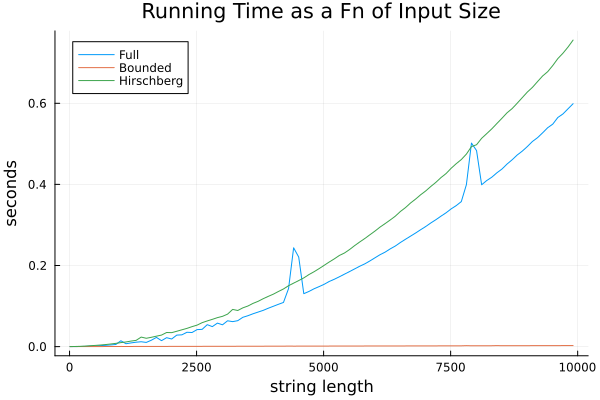

In [10]:
Plots.plot(10:100:10000, time',
           title = "Running Time as a Fn of Input Size", 
           xlabel = "string length", 
           ylabel="seconds", 
           label = ["Full" "Bounded" "Hirschberg"])

In [11]:
Plots.savefig("../data/graphics/running_time.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/running_time.png"

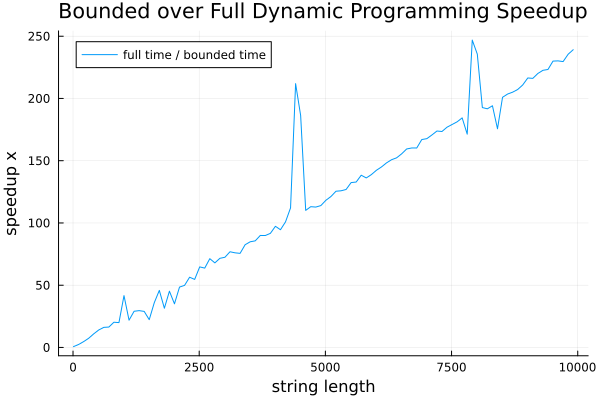

In [12]:
Plots.plot(10:100:10000, time[1,:]./time[2,:],
           title = "Bounded over Full Dynamic Programming Speedup",
           xlabel = "string length",
           ylabel = "speedup x",
           label = "full time / bounded time")

In [13]:
Plots.savefig("../data/graphics/speedup.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/speedup.png"

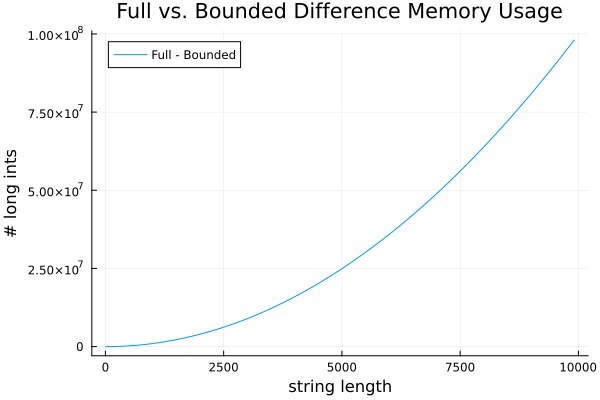

In [14]:
Plots.plot(10:100:10000, (memory[1,:] - memory[2,:])/8,
           title  = "Full vs. Bounded Difference Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label  = "Full - Bounded")

In [15]:
Plots.savefig("../data/graphics/mem_diff.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/mem_diff.png"

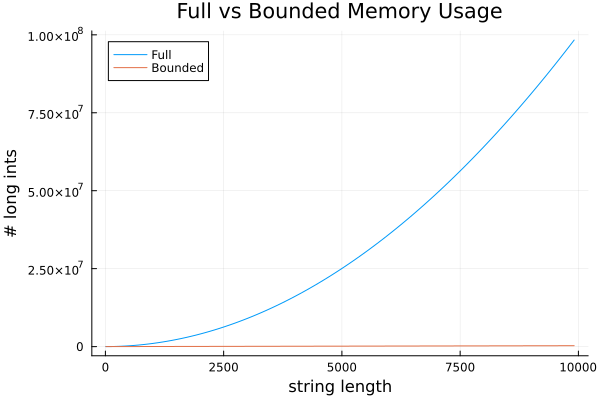

In [16]:
Plots.plot(10:100:10000, memory[1:2, :]'/8,
           title = "Full vs Bounded Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label = ["Full" "Bounded"])

In [17]:
Plots.savefig("../data/graphics/mem_both.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/mem_both.png"

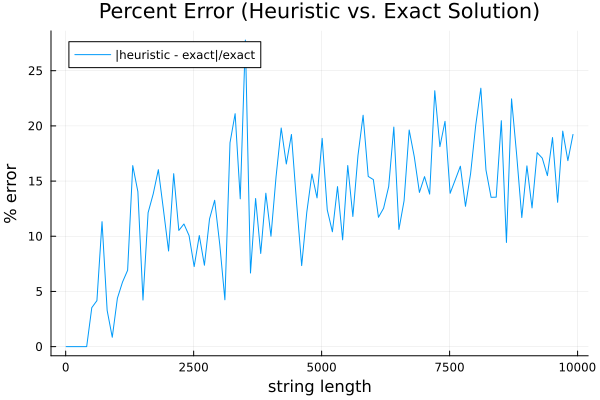

In [18]:
Plots.plot(10:100:10000, abs.(error') * 100,
           title = "Percent Error (Heuristic vs. Exact Solution)",
           xlabel = "string length",
           ylabel = "% error",
           label = "|heuristic - exact|/exact")

In [19]:
Plots.savefig("../data/graphics/error.png")

"/home/braet/Documents/Class/ThAlgs/Edist/data/graphics/error.png"